# Assignment 5: Exploratory Data Analysis and Hypothesis Testing

**Student:** [Your Name Here]  
**Dataset:** [Choose one: Air Quality, Adult Income, Heart Disease, Online Shoppers, or Solar Flare]  
**Date:** [Current Date]

## Objective
Perform exploratory data analysis (EDA) and hypothesis testing on your chosen dataset. Identify patterns and test meaningful hypotheses about relationships between variables.

---

## 1. Import Data and Libraries

Import the necessary libraries and load your dataset.

In [28]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

In [29]:
#formatting control
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

In [30]:
# #preprocessing (run this only once at the start and never again!!!!)
# #run it once and then comment out to not run again by mistake

# columns = [
#     "age", "workclass", "fnlwgt", "education", "education-num",
#     "marital-status", "occupation", "relationship", "race", "sex",
#     "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
# ]

# # Load training data
# df_train = pd.read_csv("raw-data/adult.data", names=columns, sep=",", skipinitialspace=True)

# # Load test data (skip comments and potential headers)
# df_test = pd.read_csv("raw-data/adult.test", names=columns, sep=",", skipinitialspace=True, comment='|')

# # Clean up income column (remove trailing periods from test set)
# df_test["income"] = df_test["income"].str.replace(".", "", regex=False)

# # Combine train and test into one DataFrame
# df_combined = pd.concat([df_train, df_test], ignore_index=True)

# # Save to one clean CSV
# df_combined.to_csv("adult_train.csv", index=False)

# print("Combined dataset saved as 'adult_train.csv'")
# print("Total rows:", len(df_combined))


In [31]:
#loading data
training_data = pd.read_csv("adult_train.csv")

## 2. Exploratory Data Analysis (EDA)

Explore your dataset to understand its structure and identify patterns.

In [32]:
#checking for missing values
training_data.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [33]:
print(training_data.shape) # number of rows and columns
print(training_data.info()) # data types and null counts

(48842, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [34]:
training_data.head() # first few rows

age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [35]:
#quickly summerize the dataset
training_data.describe(include='all')


age workclass     fnlwgt education  education-num  \
count  48842.00     48842   48842.00     48842       48842.00   
unique      NaN         9        NaN        16            NaN   
top         NaN   Private        NaN   HS-grad            NaN   
freq        NaN     33906        NaN     15784            NaN   
mean      38.64       NaN  189664.13       NaN          10.08   
std       13.71       NaN  105604.03       NaN           2.57   
min       17.00       NaN   12285.00       NaN           1.00   
25%       28.00       NaN  117550.50       NaN           9.00   
50%       37.00       NaN  178144.50       NaN          10.00   
75%       48.00       NaN  237642.00       NaN          12.00   
max       90.00       NaN 1490400.00       NaN          16.00   

            marital-status      occupation relationship   race    sex  \
count                48842           48842        48842  48842  48842   
unique                   7              15            6      5      2   
top     Married-civ-spouse  Prof-specialty      Husband  White   Male   
freq                 22379            6172        19716  41762  32650   
mean                   NaN             NaN          NaN    NaN    NaN   
std                    NaN             NaN          NaN    NaN    NaN   
min                    NaN             NaN          NaN    NaN    NaN   
25%                    NaN             NaN          NaN    NaN    NaN   
50%                    NaN             NaN          NaN    NaN    NaN   
75%                    NaN             NaN          NaN    NaN    NaN   
max                    NaN             NaN          NaN    NaN    NaN   

        capital-gain  capital-loss  hours-per-week native-country income  
count       48842.00      48842.00        48842.00          48842  48842  
unique           NaN           NaN             NaN             42      2  
top              NaN           NaN             NaN  United-States  <=50K  
freq             NaN           NaN             NaN          43832  37155  
mean         1079.07         87.50           40.42            NaN    NaN  
std          7452.02        403.00           12.39            NaN    NaN  
min             0.00          0.00            1.00            NaN    NaN  
25%             0.00          0.00           40.00            NaN    NaN  
50%             0.00          0.00           40.00            NaN    NaN  
75%             0.00          0.00           45.00            NaN    NaN  
max         99999.00       4356.00           99.00            NaN    NaN

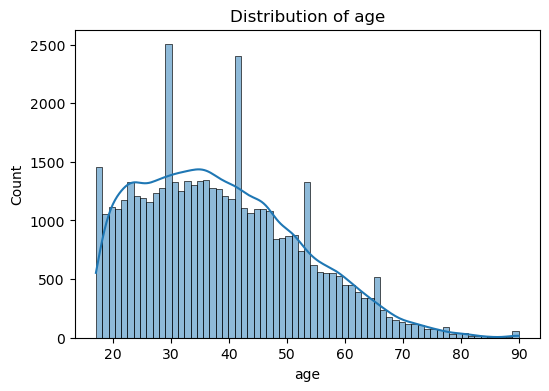

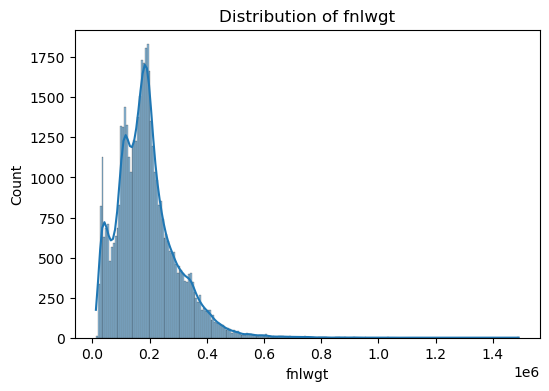

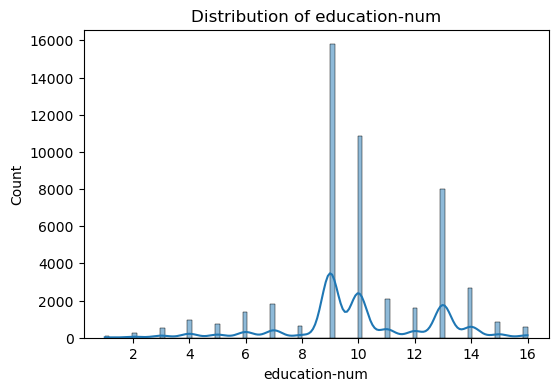

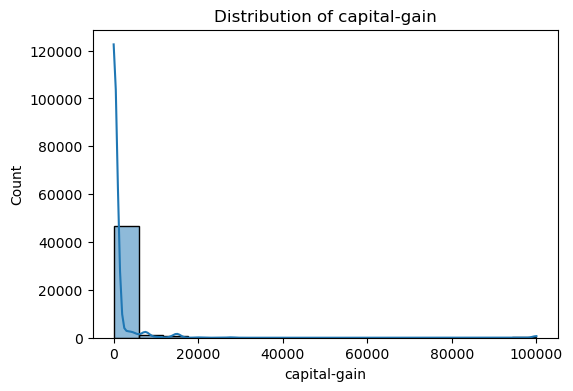

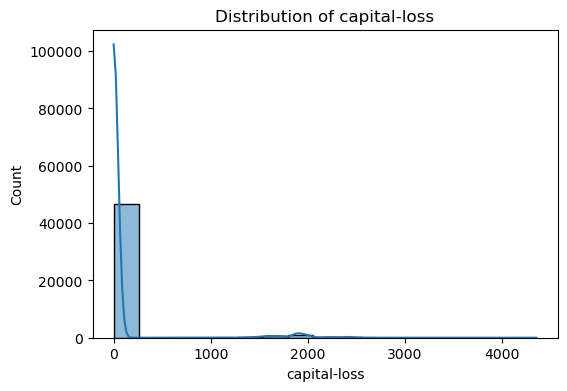

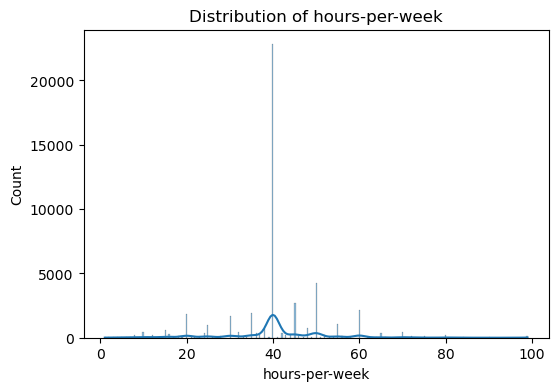

In [36]:
#quick plots of univariate data columns within the dataset

numeric_columns = training_data.select_dtypes(include=['int64', 'float64']).columns

for columns in numeric_columns:
    plt.figure(figsize=(6,4))
    sns.histplot(training_data[columns], kde=True) # this ignores missing NaN values.
    plt.title(f"Distribution of {columns}")
    plt.show()

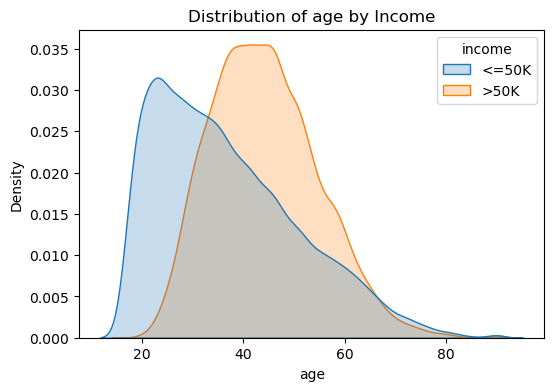

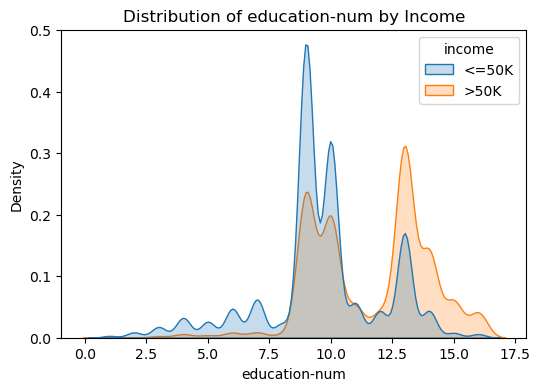

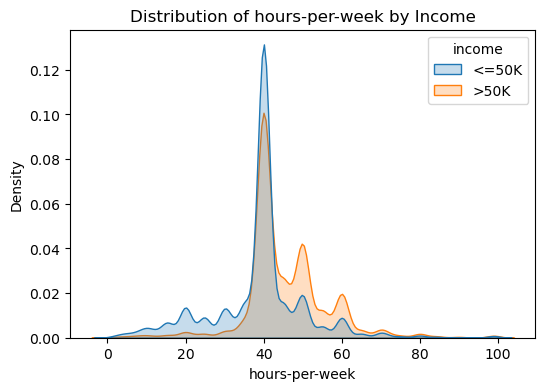

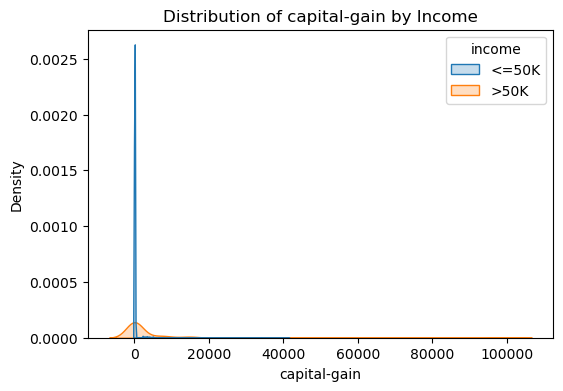

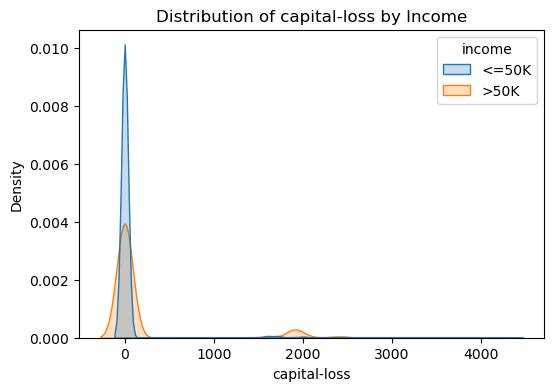

In [37]:
#relationship analysis of numerical columns with income
#using KDE/Histograms by income

numerical_columns = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']

for columns in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=training_data, x=columns, hue='income', fill=True, common_norm=False)
    plt.title(f"Distribution of {columns} by Income")
    plt.show()


In [38]:
#averages of numerical values when compared against income
training_data.groupby('income')[['age', 'education-num', 'capital-gain','capital-loss', 'hours-per-week']].mean()


age  education-num  capital-gain  capital-loss  hours-per-week
income                                                                 
<=50K  36.87           9.60        147.01         54.15           38.84
>50K   44.28          11.60       4042.24        193.53           45.45

In [39]:
# histogram by income (I used plotly)
for columns in numerical_columns:
    fig = px.histogram(training_data, x=columns, color="income", marginal="box", barmode="overlay", opacity=0.65,
                    title=f"{columns} by income")
    fig.show()

# scatter with trendline (needs statsmodels so just remove trendline if not installed)
if {"age","hours-per-week"}.issubset(training_data.columns):
    fig = px.scatter(training_data.sample(min(8000, len(training_data), 8000), random_state=42),
                    x="age", y="hours-per-week", color="income",
                    opacity=0.4, trendline="ols", title="Age vs Hours-per-week by income")
    fig.show()


In [40]:
#categorical columns relationship analysis with income
categorical_columns = training_data.select_dtypes(include='object').columns
categorical_columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'income'],
      dtype='object')

In [41]:
#categorical columns relationship analysis with income basic statistics (%)
for columns in categorical_columns:
    if columns != 'income':
        cross_tab = pd.crosstab(training_data[columns], training_data['income'], normalize='index') * 100
        print(f"\n{columns}:\n")
        print(cross_tab)


workclass:

income            <=50K  >50K
workclass                    
?                 90.53  9.47
Federal-gov       60.82 39.18
Local-gov         70.44 29.56
Never-worked     100.00  0.00
Private           78.21 21.79
Self-emp-inc      44.66 55.34
Self-emp-not-inc  72.11 27.89
State-gov         73.25 26.75
Without-pay       90.48  9.52

education:

income        <=50K  >50K
education                
10th          93.74  6.26
11th          94.92  5.08
12th          92.69  7.31
1st-4th       96.76  3.24
5th-6th       94.70  5.30
7th-8th       93.51  6.49
9th           94.58  5.42
Assoc-acdm    74.20 25.80
Assoc-voc     74.67 25.33
Bachelors     58.72 41.28
Doctorate     27.44 72.56
HS-grad       84.14 15.86
Masters       45.09 54.91
Preschool     98.80  1.20
Prof-school   26.02 73.98
Some-college  81.04 18.96

marital-status:

income                 <=50K  >50K
marital-status                    
Divorced               89.88 10.12
Married-AF-spouse      62.16 37.84
Married-civ-spouse

In [42]:
#categorical columns relationship analysis with income (rank categories by highest income share in %)

for columns in categorical_columns:
    if columns != 'income':
        share = (
            training_data.groupby(columns)['income']
            .value_counts(normalize=True)
            .unstack()
            .get('>50K', 0)
            .sort_values(ascending=False)
        )
        print(f"\nTop {columns} categories by >50K rate:\n", share.head())



Top workclass categories by >50K rate:
 workclass
Self-emp-inc       0.55
Federal-gov        0.39
Local-gov          0.30
Self-emp-not-inc   0.28
State-gov          0.27
Name: >50K, dtype: float64

Top education categories by >50K rate:
 education
Prof-school   0.74
Doctorate     0.73
Masters       0.55
Bachelors     0.41
Assoc-acdm    0.26
Name: >50K, dtype: float64

Top marital-status categories by >50K rate:
 marital-status
Married-civ-spouse      0.45
Married-AF-spouse       0.38
Divorced                0.10
Married-spouse-absent   0.09
Widowed                 0.08
Name: >50K, dtype: float64

Top occupation categories by >50K rate:
 occupation
Exec-managerial   0.48
Prof-specialty    0.45
Armed-Forces      0.33
Protective-serv   0.31
Tech-support      0.29
Name: >50K, dtype: float64

Top relationship categories by >50K rate:
 relationship
Wife             0.47
Husband          0.45
Not-in-family    0.10
Unmarried        0.06
Other-relative   0.03
Name: >50K, dtype: float64

Top ra

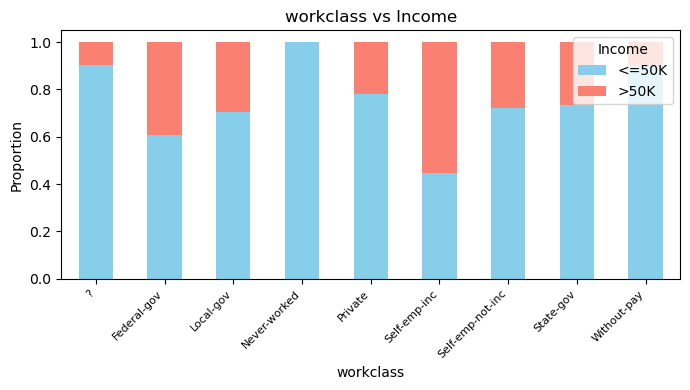

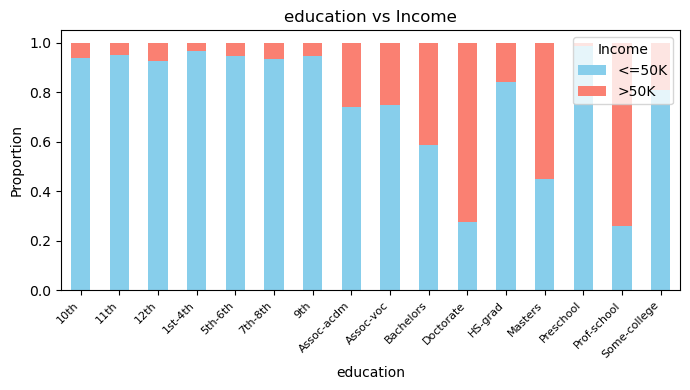

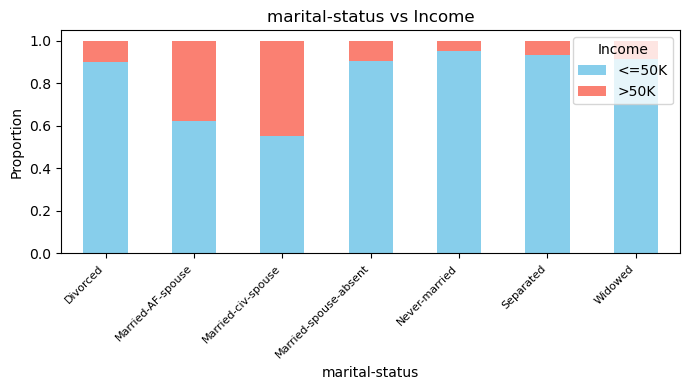

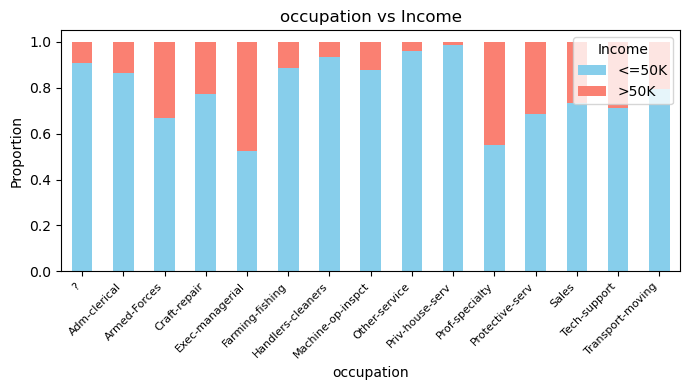

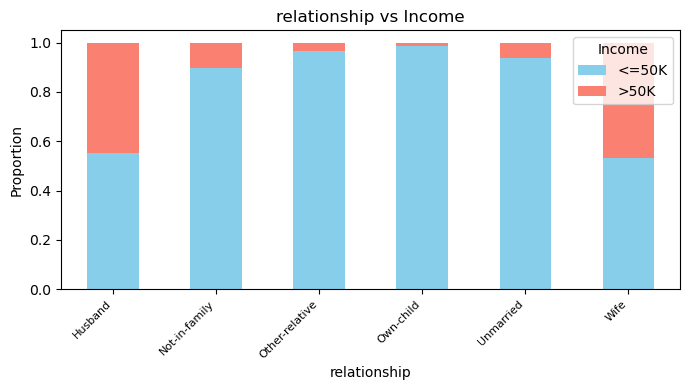

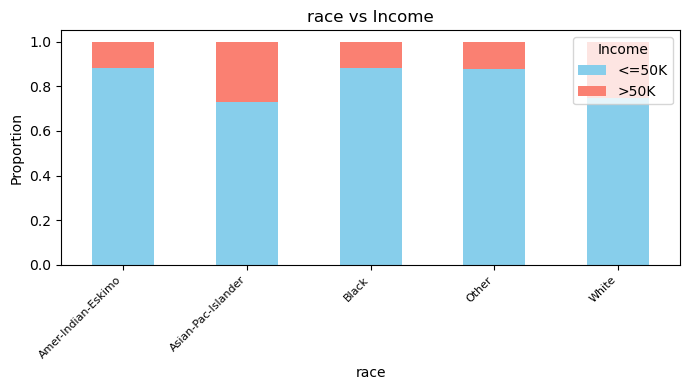

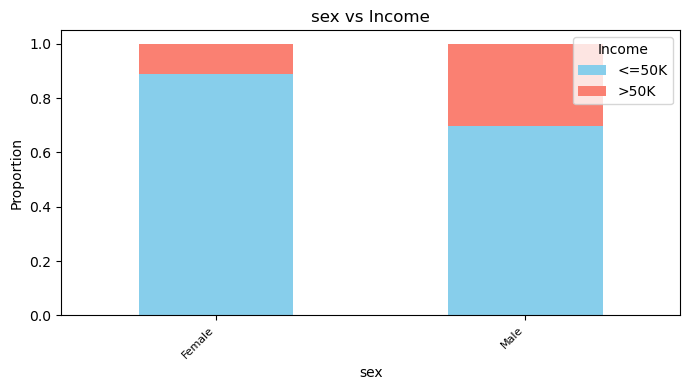

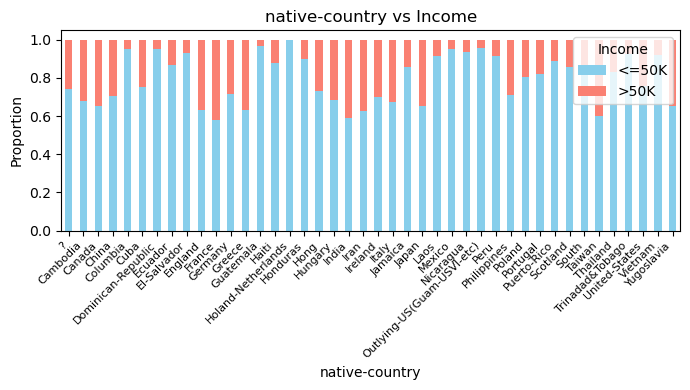

In [43]:
#categorical columns relationship analysis with income with charts
for columns in categorical_columns:
    if columns != 'income':
        cross_tab = pd.crosstab(training_data[columns], training_data['income'], normalize='index')
        cross_tab.plot(kind='bar', stacked=True, figsize=(7,4), color=['skyblue','salmon'])
        plt.title(f"{columns} vs Income")
        plt.ylabel("Proportion")
        plt.xlabel(columns)
        plt.xticks(rotation=45, ha='right', fontsize=8)  # smaller font
        plt.legend(title='Income', loc='upper right')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

## 3. Hypothesis Formulation

Based on your EDA, formulate **2-3 testable hypotheses**. Each hypothesis should be:
- Clear and specific
- Testable with statistical methods
- Grounded in your observations

### Hypothesis 1: Education and Income
**Question:** Does higher education lead to higher income?  

**H1:** Individuals with higher education levels are more likely to earn greater than $50K per year.  
- **Null Hypothesis (H₀):** There is no relationship between education level and income. The proportion of >$50K earners is the same across all education levels.  
- **Alternative Hypothesis (H₁):** The proportion of >$50K earners increases as the years of education increases.  
- **Rationale:** Education often enhances skills and qualifications that improve access to higher-paying jobs. The EDA showed a visible upward trend where more years of education had a greater share of >$50K earners compared to lower education levels.

---

### Hypothesis 2: Workclass and Income
**Question:** Does the type of workclass (employer type) influence income level?  

**H2:** Income distribution differs depending on a person’s workclass (type of employer).  
- **Null Hypothesis (H₀):** Workclass and income are independent. The type of employer does not influence income level.  
- **Alternative Hypothesis (H2):** Workclass and income are associated. Certain workclasses (e.g., self-employed or government) have a higher proportion of >$50K earners.  
- **Rationale:** Different work environments provide different pay structures and benefits. The EDA indicated that self-employed and government workers tended to have higher income rates than private-sector workers.

---

### Hypothesis 3: Hours-per-Week and Income
**Question:** Do individuals who work longer hours per week tend to earn more?  

**H3:** Individuals who work longer hours per week tend to earn higher incomes.  
- **Null Hypothesis (H₀):** The average hours worked per week are the same for ≤$50K and >$50K earners.  
- **Alternative Hypothesis (H3):** Individuals earning >$50K work significantly more hours per week on average than those earning ≤$50K.  
- **Rationale:** Working longer hours can increase total earnings or reflect higher-level positions that demand greater commitment. The EDA showed that >$50K earners typically cluster toward higher weekly hours.


---


## 4. Hypothesis Testing

Test each hypothesis using appropriate statistical methods. For each test, explain:
- Why you chose this test
- The results and interpretation
- Whether you reject or fail to reject the null hypothesis

### Testing Hypothesis 1: The proportion of >$50K earners increases as the years of education increases.

**Test Choice:** chi-square
- **Why appropriate:** Both variables (education, income) are categorical. Also we’re not predicting a numeric value. We’re just checking whether the distribution of income categories differs across education levels. The Chi-square test compares the observed frequency in each cell with what would be expected if the two variables were independent.

In [44]:
# contingency table
edu_ct = pd.crosstab(training_data['education'], training_data['income'])

# Chi-square test using SciPy
chi2, p, dof, expected = stats.chi2_contingency(edu_ct)

print(f"Chi-square = {chi2:.2f}, df = {dof}, p = {p:.4e}")

if p < 0.05:
    print("Reject H0: There is a significant relationship between education and income.")
else:
    print("Fail to reject H0: No significant relationship detected.")

if p == 0:
    print("\nP values can't actually be zero.\nComputational mathematical rounding issues cause numbers very close to zero to become zero due to hardware limitations.")


Chi-square = 6537.97, df = 15, p = 0.0000e+00
Reject H0: There is a significant relationship between education and income.

P values can't actually be zero.
Computational mathematical rounding issues cause numbers very close to zero to become zero due to hardware limitations.


### Testing Hypothesis 2: Workclass and income are associated. Certain workclasses (e.g., self-employed or government) have a higher proportion of >$50K earners.

**Test Choice:** chi-square
- **Why appropriate:** Because both workclass and income are categorical (non-numeric) variables, we can’t compare means or correlations.
The chi square test is used instead to check whether the distribution of income categories differs significantly across workclass groups essentially detecting if the two variables are correlated.

In [45]:
# contingency table
workclass_ct = pd.crosstab(training_data["workclass"], training_data["income"])

# chi-square test
chi2, p, dof, expected = stats.chi2_contingency(workclass_ct)

print(f"Chi-square = {chi2:.2f},  df = {dof},  p = {p:.4e}")

if p < 0.05:
    print("Reject H0: Workclass and income are significantly associated.")
else:
    print("Fail to reject H0: No significant relationship detected.")

if p == 0:
    print("\nP values can't actually be zero.\nComputational mathematical rounding issues cause numbers very close to zero to become zero due to hardware limitations.")



Chi-square = 1610.75,  df = 8,  p = 0.0000e+00
Reject H0: Workclass and income are significantly associated.

P values can't actually be zero.
Computational mathematical rounding issues cause numbers very close to zero to become zero due to hardware limitations.


In [46]:
n = workclass_ct.values.sum()
v = np.sqrt(chi2 / (n * (min(workclass_ct.shape) - 1)))
print(f"Cramer's V = {v:.3f}")

Cramer's V = 0.182


### Testing Hypothesis 3: Individuals earning >$50K work significantly more hours per week on average than those earning ≤$50K.

**Test Choice:** t-test
- **Why appropriate:** We are using the t-test because we are comparing the average hours worked (numerical variable) between two income groups of over and under 50k. Since however the graph of these values are not normally distributed we aren't supposed to use the t-test. However our dataset is large enough so the t-test still remains accurate.

In [50]:
low_income = training_data.loc[training_data["income"] == "<=50K", "hours-per-week"]
high_income = training_data.loc[training_data["income"] == ">50K", "hours-per-week"]

t_stat, p_val_t = stats.ttest_ind(high_income, low_income, equal_var=False)

print(f"t-statistic = {t_stat:.3f}")
print(f"p-value = {p_val_t:.4e}")

if p_val_t < 0.05:
    print("Reject H0: Average hours differ significantly between income groups.")
else:
    print("Fail to reject H0: No significant difference in hours worked.")


t-statistic = 54.662
p-value = 0.0000e+00
Reject H0: Average hours differ significantly between income groups.


## 5. Summary and Conclusions

### Key Findings from EDA:
1. [List your main observations from the exploratory analysis]

    A. The data appears to be from the 1990s U.S. Census, which means social and economic patterns might differ from those of a modern dataset.

    B. Capital-gain and capital-loss are highly skewed, with most observations at zero and a few extreme outliers, suggesting that only a small subset of the population reports significant investment income or losses.

    C. The dataset contains both categorical (education, workclass, occupation, marital status) and numeric features (age, hours-per-week, capital-gain, capital-loss).

    D. There are several missing or unknown entries, indicated by "?", particularly in workclass, occupation, and native-country. These likely represent unreported or ambiguous values.


2.  [Describe patterns you identified]

    A. Education: Higher education levels strongly correlate with a greater proportion of >$50K earners.

    B. Workclass: Government and self-employed workers have more high-income individuals than private or unpaid roles.

    C. Hours-per-week: Higher-income groups tend to work more hours, with a noticeable cluster at 40 hours for both groups.

    D. Capital gains/losses: Skewed distributions as most individuals report zero, but a small subset shows extremely high values.

3. [Note any interesting relationships]

    A. A clear upward trend exists between education level and income, confirming that educational attainment is a major driver of earnings.

    B. Workclass and income show a statistically significant but weaker relationship. This suggests job type DOES influences income, but not as strongly as education.

    C. Hours worked per week has a meaningful connection to income level, reinforcing the idea that people who work longer hours are more likely to earn more.

### Hypothesis Testing Results:

| Hypothesis | Test Used | p-value | Result | Interpretation |
|------------|-----------|---------|--------|-----------------|
| **H1** | chi-square | close to 0 | [Significant] | See Below. |
| **H2** | chi-square | close to 0 | [Significant] | See Below. |
| **H3** | t-test | close to 0 | [Significant] | See Below. |

1. Interpretation (H1) : People with higher education levels are much more likely to earn above $50K.
The relationship between education and income is strong and statistically significant, meaning education plays a key role in income differences.

2. Interpretation (H2) : Different work sectors show noticeable but smaller differences in income. Those who are self-employed or in government jobs tend to have higher proportions of >$50K earners, though the overall relationship is moderate in strength.

3. Interpretation (H3) : Individuals earning >$50K work significantly more hours per week on average than those earning ≤$50K. This suggests that longer working hours are associated with higher income, and the result is statistically significant.

### Key Insights:
- The results show that education, workclass, and hours worked per week all have significant relationships with income level. Education seems to have the strongest effect individuals with higher degrees (Bachelor's, Master's, Doctorate) are far more likely to earn above $50K. Workclass also matters, though its impact is smaller, with self-employed and government workers showing higher proportions of high earners. Finally, the hours-per-week analysis confirms that people earning >$50K tend to work longer hours on average, suggesting that time commitment contributes to the income differences.
- These findings imply that income inequality is closely tied to both educational attainment and job type. Policies that expand access to higher education or promote fair advancement opportunities across work sectors could help narrow income gaps. For individuals, the analysis suggests that investing in education and professional career paths has a measurable impact on potential earnings.
- The dataset is observational and identifies associations, not direct causation. Several variables (such as fnlwgt, occupation, or native-country) were not analyzed in depth and could influence the end results. There are missing or unknown entries ("?" values representing unknown careers) that might slightly bias certain outcomes. The dataset is also from the 1990s U.S. Census, meaning the relationships may not reflect today's economy or workforce structure.

### Future Research:
- Using models like logistic regression or decision trees could help quantify how much each variable contributes to income prediction. Use predictive models to learn this data and see how well it predicts againsts the updated data from today.
- Further analysis could include parental occupation type (first-gen or not), education field, or interaction effects (such as education x gender) to uncover more socioeconomic patterns. It would also be interesting to compare these findings to more recent datasets to see how income dynamics have changed over time.